1.1 Haga el preprocesamiento del dataset, explique qué variables no aportan información a la
generación de grupos y por qué. Describa con qué variables calculará los grupos.

Variables que no aportan al clustering

- id: Identificador único de la película, no es útil para agrupación.
- homePage: URL de la película, irrelevante para clustering.
- originalTitle y title: Nombres de la película, categóricos y no relevantes para clustering.
- director, actors, actorsCharacter: Son nombres de personas, no numéricos ni fácilmente agrupables.
- originalLanguage: Puede ser útil en algunos análisis, pero es categórica y tendría que transformarse antes de usarla.
- video: Indica si hay versión en video, pero es poco informativo para clustering.

Variables útiles

- budget: Presupuesto de la película.
- revenue: Ingresos generados.
- runtime: Duración de la película.
- popularity: Popularidad de la película.
- voteAvg y voteCount: Promedio de votos y cantidad de votos.
- genresAmount: Cantidad de géneros.
- productionCoAmount y productionCountriesAmount: Cantidad de productoras y países de producción.
- actorsAmount, castWomenAmount, castMenAmount: Cantidad de actores y distribución por género.


1.2 Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual
Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las
dimensiones del conjunto de datos. Discuta sus resultados e impresiones.

In [ ]:
import random
import pandas as pd
import numpy as np
import pyclustertend
import seaborn as sns
import scipy.spatial.distance as ssd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo CSV
df = pd.read_csv("movies.csv", encoding="latin1")

# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Manejo de valores nulos 
df_numeric = df_numeric.dropna()  # Elimina filas con valores nulos

# Normalizar los datos
scaler = MinMaxScaler()
data = scaler.fit_transform(df_numeric)

# Fijar la semilla para obtener resultados reproducibles
random.seed(123)

# Calcular la estadística de Hopkins
hopkins_stat = pyclustertend.hopkins(data, len(data))  
print(f'Estadística de Hopkins: {hopkins_stat:.4f}')

# Función para generar la matriz VAT
def vat_plot(X):
    # Calcular la matriz de distancias
    distance_matrix = ssd.squareform(ssd.pdist(X))
    
    # Aplicar clustering jerárquico para reordenar la matriz
    linkage_matrix = sch.linkage(distance_matrix, method='average')
    order = sch.dendrogram(linkage_matrix, no_plot=True)['leaves']
    
    # Reordenar la matriz de distancia según el clustering
    sorted_matrix = distance_matrix[np.ix_(order, order)]
    
    # Graficar la matriz VAT
    plt.figure(figsize=(8, 8))
    sns.heatmap(sorted_matrix, cmap='viridis', xticklabels=False, yticklabels=False)
    plt.title("VAT - Visual Assessment of Cluster Tendency")
    plt.show()

# Ejecutar VAT
vat_plot(data)

Estadística de Hopkins: 0.0314
Como se puede observar el estadístico de hopkings no es igual a 0.5 por lo que se dice que es factible hacer agrupamiento.

A continuación vemos la gráfica VAT (Visual Assessment of cluster Tendency)

In [ ]:
vat_plot(data)

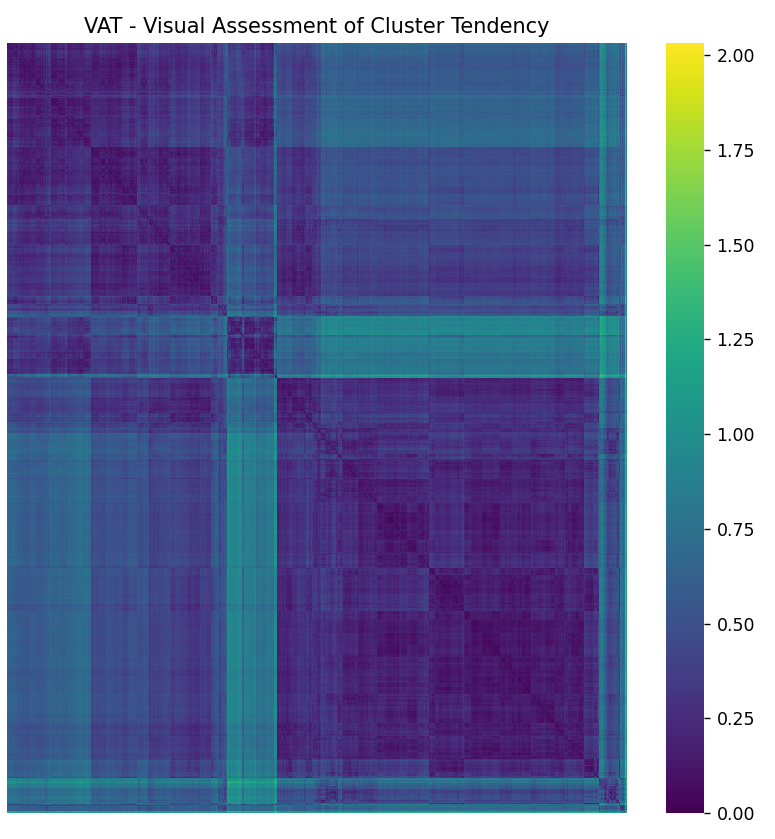

En la gráfica anterior podemos observar regiones oscuras a lo largo de la diagonal, lo que indica la existencia de clústeres. Se puede observar que están bien definidos por lo que la estructura de los clústeres es fuerte.

1.3 Determine cuál es el número de grupos a formar más adecuado para los datos que está
trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de
clústeres con la que trabajará.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

movies_df = pd.read_csv("movies.csv", encoding="ISO-8859-1")
# Selección de columnas numéricas relevantes para clustering
columns = ["budget", "revenue", "runtime", "popularity", "voteAvg", "genresAmount", "productionCoAmount","productionCountriesAmount", "actorsAmount"]
movies_numeric = movies_df[columns].dropna()

# Escalar los datos para normalizar las magnitudes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(movies_numeric)

# Método del codo: calcular la inercia para diferentes valores de k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8, label="Inercia")
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k óptimo')
plt.xticks(K)
plt.grid(True)
plt.legend()
plt.show()

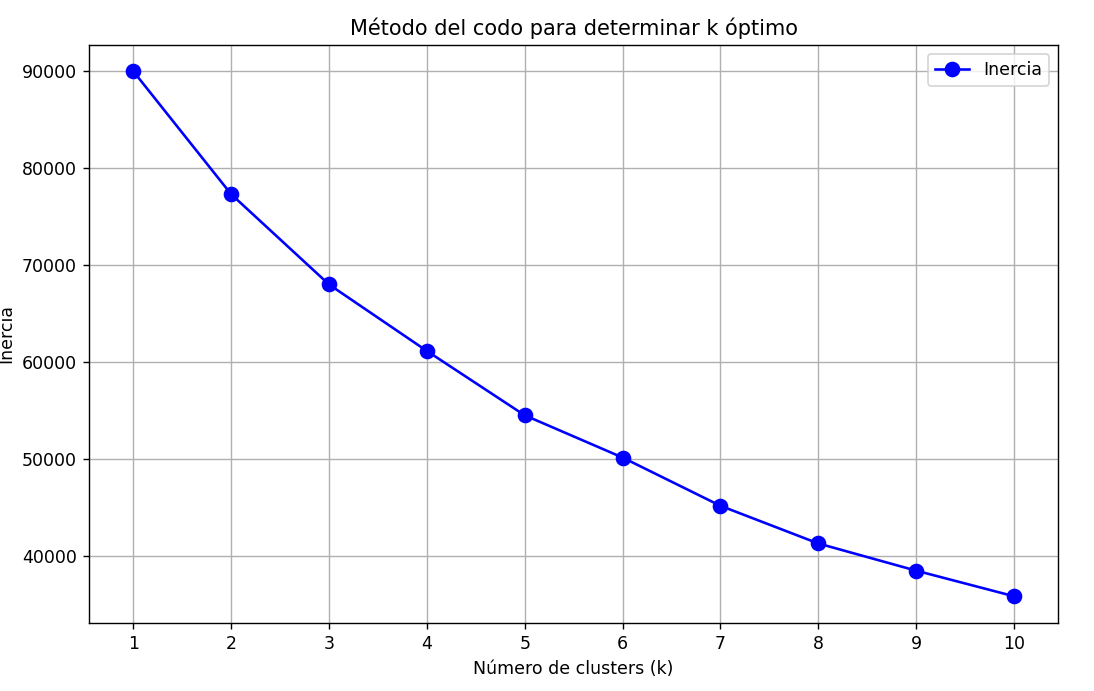

Según la gráfica de codo anterior, el valor de k óptimo es 4, ya que después de este punto la reducción de la inercia es mínima, lo que indicaría que añadir más clústeres no aportaría una mejora a la segmentación de datos.